In [7]:
import numpy as np
from matplotlib import pyplot as plt

%matplotlib inline

Magnetic field produced by a dipole is [(see wikipedia)](https://en.wikipedia.org/wiki/Magnetic_dipole):

$$\mathbf{B}({\mathbf{r}}) = \frac{\mu_{0}}{4\pi}\left(\frac{3\mathbf{r}(\mathbf{m}\cdot\mathbf{r})}{r^{5}} - \frac{{\mathbf{m}}}{r^{3}}\right)$$


According to [WolframAlpha](http://www.wolframalpha.com/input/?i=%CE%BC0):
$$\mu_{0} = \frac{\pi}{2.5 \cdot 10^6}\ \frac{\mathrm{N}}{\mathrm{A}^2}$$

$$\frac{\mu_{0}}{4\pi} = \frac{\pi}{4 \pi \cdot 2.5 \cdot 10^6} = 10^{-7}\, \frac{\mathrm{H}}{\mathrm{m}}$$

In [8]:
def dipole(m, r, r0):
    """Calculate a field in point r created by a dipole moment m located in r0.
    Spatial components are the outermost axis of r and returned B.
    """
    # we use np.subtract to allow r and r0 to be a python lists, not only np.array
    R = np.subtract(np.transpose(r), r0).T
    
    # assume that the spatial components of r are the outermost axis
    norm_R = np.sqrt(np.einsum("i...,i...", R, R))
    
    # calculate the dot product only for the outermost axis,
    # that is the spatial components
    m_dot_R = np.tensordot(m, R, axes=1)

    # tensordot with axes=0 does a general outer product - we want no sum
    B = 3 * m_dot_R * R / norm_R**5 - np.tensordot(m, 1 / norm_R**3, axes=0)
    
    # include the physical constant
    B *= 1e-7

    return B

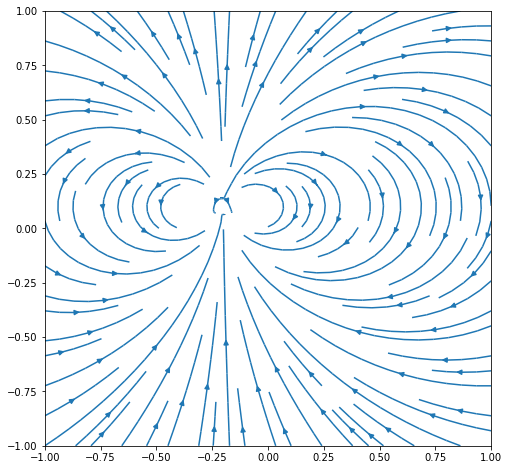

In [5]:
X = np.linspace(-1, 1)
Y = np.linspace(-1, 1)

Bx, By = dipole(m=[0, 0.1], r=np.meshgrid(X, Y), r0=[-0.2,0.1])

plt.figure(figsize=(8, 8))
plt.streamplot(X, Y, Bx, By)
plt.margins(0, 0)

In [ ]:
BackgroundField = 

Works in 3 dimensions as well:

In [6]:
dipole(m=[1, 2, 3], r=[1, 1, 2], r0=[0, 0, 0])

array([2.38144836e-08, 1.70103454e-08, 4.08248290e-08])